In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoLocator, MaxNLocator
from scipy import stats
import datetime as dt

In [9]:
def abline(slope, intercept, axis, color, label):
    x_vals = np.array(axis.get_xlim())
    y_vals = intercept + slope * x_vals
    axis.plot(x_vals, y_vals, c=color, label=label)

In [ ]:
artemis_data_g = pd.read_csv('inputs/Artemis_SWMF_Input_2012.txt', sep='\s+', header=None, names=['year', 'month', 'day', 'hour', 'minute', 'second', 'ms', 'Bx', 'By', 'Bz', 'Vx', 'Vy', 'Vz', 'N', 'T'])
artemis_data_g['Date'] = pd.to_datetime(artemis_data[['year', 'month', 'day', 'hour', 'minute', 'second', 'ms']])
artemis_data_g.drop(['year', 'month', 'day', 'hour', 'minute', 'second', 'ms'], axis=1, inplace=True)

omni_data = pd.read_csv('inputs/Omni_SWMF_Input_2012.txt', sep='\s+', header=None, names=['year', 'month', 'day', 'hour', 'minute', 'second', 'ms', 'Bx', 'By', 'Bz', 'Vx', 'Vy', 'Vz', 'N', 'T'])
omni_data['Date'] = pd.to_datetime(omni_data[['year', 'month', 'day', 'hour', 'minute', 'second', 'ms']])
omni_data.drop(['year', 'month', 'day', 'hour', 'minute', 'second', 'ms'], axis=1, inplace=True)

In [ ]:
artemis_data = pd.read_csv('inputs/Artemis_SWMF_Input_2022.txt', sep='\s+', header=None, names=['year', 'month', 'day', 'hour', 'minute', 'second', 'ms', 'Bx', 'By', 'Bz', 'Vx', 'Vy', 'Vz', 'N', 'T'])
artemis_data['Date'] = pd.to_datetime(artemis_data[['year', 'month', 'day', 'hour', 'minute', 'second', 'ms']])
artemis_data.drop(['year', 'month', 'day', 'hour', 'minute', 'second', 'ms'], axis=1, inplace=True)

omni_data = pd.read_csv('inputs/Omni_SWMF_Input_2022.txt', sep='\s+', header=None, names=['year', 'month', 'day', 'hour', 'minute', 'second', 'ms', 'Bx', 'By', 'Bz', 'Vx', 'Vy', 'Vz', 'N', 'T'])
omni_data['Date'] = pd.to_datetime(omni_data[['year', 'month', 'day', 'hour', 'minute', 'second', 'ms']])
omni_data.drop(['year', 'month', 'day', 'hour', 'minute', 'second', 'ms'], axis=1, inplace=True)

In [ ]:
target_date = dt.datetime(2022, 5, 27, 12, 0, 0)
index = artemis_data.index[artemis_data['Date'] == target_date][0]
pearson_corr, _ = stats.pearsonr(artemis_data['Bz'][index:], omni_data['Bz'][index:])

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.set_box_aspect(1)
ax.scatter(omni_data['Bz'][index:], artemis_data['Bz'][index:], label='2012-11-13 Event')

statistics = stats.linregress(omni_data['Bz'][index:], artemis_data['Bz'][index:])
abline(statistics[0], statistics[1], ax, color='red')

equation_text = f'y = {statistics.slope:.2f}x + {statistics.intercept:.2f} \nCorrelation: {round(pearson_corr, 3)}'
ax.text(0.01, 0.99, equation_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', pad=3))
#ax.text(0.01, 0.95, 'Correlation: {}'.format(round(pearson_corr, 3)), transform=ax.transAxes, fontsize=12, verticalalignment='top')

ax.set(xlabel='Omni Bz [nT]', ylabel='Artemis Bz [nT]', title='Omni and Artemis Linear Regression Fit')

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.legend(loc='lower right')
ax.grid(visible=True, which='major', axis='both', c='0.7')

plt.tight_layout()
plt.savefig('plots/OvsA_linregress.jpg')

In [3]:
SYMH = pd.read_csv('2022-05-27_SYMH.txt', delimiter='\s+')
SYMH['Date'] = pd.to_datetime(SYMH['DATE']+' '+SYMH['TIME'], format="%Y-%m-%d %H:%M:%S.%f")
SYMH.drop(['DATE', 'TIME'], axis=1, inplace=True)

AE = pd.read_csv('2022-05-27_AE.csv', delimiter=',', header=0)
AE['Date'] = pd.to_datetime(AE['Date_UTC'], format='%Y-%m-%d %H:%M:%S')
AE.drop(['Date_UTC'], axis=1, inplace=True)

In [4]:
Omni_AE = pd.read_csv('Omni_SWMF_AE_2022.txt', sep='\s+', header=None, comment='#', usecols=[0,1,2,3,4,34], names=['year', 'month', 'day', 'hour', 'minute', 'AE'])
Omni_AE['Date'] = pd.to_datetime(Omni_AE[['year', 'month', 'day', 'hour', 'minute']])
Omni_AE.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Artemis_AE = pd.read_csv('Artemis_SWMF_AE_2022.txt', sep='\s+', header=None, comment='#', usecols=[0,1,2,3,4,34], names=['year', 'month', 'day', 'hour', 'minute', 'AE'])
Artemis_AE['Date'] = pd.to_datetime(Artemis_AE[['year', 'month', 'day', 'hour', 'minute']])
Artemis_AE.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Omni_SYMH = pd.read_csv('Omni_SWMF_SYMH_2022.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7], names=['year', 'month', 'day', 'hour', 'minute', 'DST'])
Omni_SYMH['Date'] = pd.to_datetime(Omni_SYMH[['year', 'month', 'day', 'hour', 'minute']])
Omni_SYMH.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Artemis_SYMH = pd.read_csv('Artemis_SWMF_SYMH_2022.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7], names=['year', 'month', 'day', 'hour', 'minute', 'DST'])
Artemis_SYMH['Date'] = pd.to_datetime(Artemis_SYMH[['year', 'month', 'day', 'hour', 'minute']])
Artemis_SYMH.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Omni_Currents = pd.read_csv('Omni_SWMF_Diss_2022.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7,13], names=['year', 'month', 'day', 'hour', 'minute', 'current', 'diss'])
Omni_Currents['Date'] = pd.to_datetime(Omni_Currents[['year', 'month', 'day', 'hour', 'minute']])
Omni_Currents.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Artemis_Currents = pd.read_csv('Artemis_SWMF_Diss_2022.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7,13], names=['year', 'month', 'day', 'hour', 'minute', 'current', 'diss'])
Artemis_Currents['Date'] = pd.to_datetime(Artemis_Currents[['year', 'month', 'day', 'hour', 'minute']])
Artemis_Currents.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

In [5]:
Artemis_Currents.drop_duplicates(inplace=True)
Omni_Currents.drop_duplicates(inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'plots/indexstats.jpg'

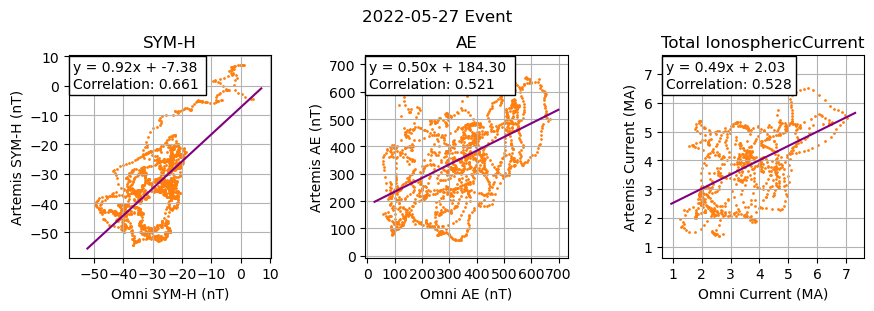

In [76]:
x=[Omni_SYMH['DST'][60:], Omni_AE['AE'][60:], Omni_Currents['current'][30:]]
y=[Artemis_SYMH['DST'][60:], Artemis_AE['AE'][60:], Artemis_Currents['current'][30:]]
colors = ['C1', 'C1', 'C1']
titles=['SYM-H', 'AE', 'Total IonosphericCurrent']
xlabels = ['Omni SYM-H (nT)', 'Omni AE (nT)', 'Omni Current (MA)']
ylabels = ['Artemis SYM-H (nT)', 'Artemis AE (nT)', 'Artemis Current (MA)']


fig, axs = plt.subplots(1, 3, figsize=(9,3))

for i, ax in enumerate(axs):
    ax.set_box_aspect(1)
    ax.scatter(x[i], y[i], s=1, c=colors[i])
    statistics = stats.linregress(x[i], y[i])
    abline(statistics[0], statistics[1], ax, color='purple')

    min_limit = min(ax.get_xlim() + ax.get_ylim())
    max_limit = max(ax.get_xlim() + ax.get_ylim())
    ax.set_xlim(min_limit, max_limit)
    ax.set_ylim(min_limit, max_limit)
    ax.xaxis.set_major_locator(MaxNLocator(8))
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.grid(visible=True, which='major', axis='both', c='0.7')

    ax.set(title=titles[i], xlabel=xlabels[i], ylabel=ylabels[i])

    equation_text = f'y = {statistics.slope:.2f}x + {statistics.intercept:.2f} \nCorrelation: {round(statistics.rvalue, 3)}'
    ax.text(0.02, 0.975, equation_text, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', pad=3))

plt.suptitle('2022-05-27 Event')
plt.tight_layout()
plt.savefig('plots/indexstats.jpg', dpi=300)

In [6]:
with open('ampere-2022.txt', 'r') as f:
    header_row = f.readline().strip().split(', ')
ampere = pd.read_csv('ampere-2022.txt', delimiter='\s+', skiprows=1, names=header_row)
ampere.reset_index(drop=True, inplace=True)

ampere['Date'] = pd.to_datetime(ampere[['year', 'month', 'day', 'hour', 'minute']])
ampere.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

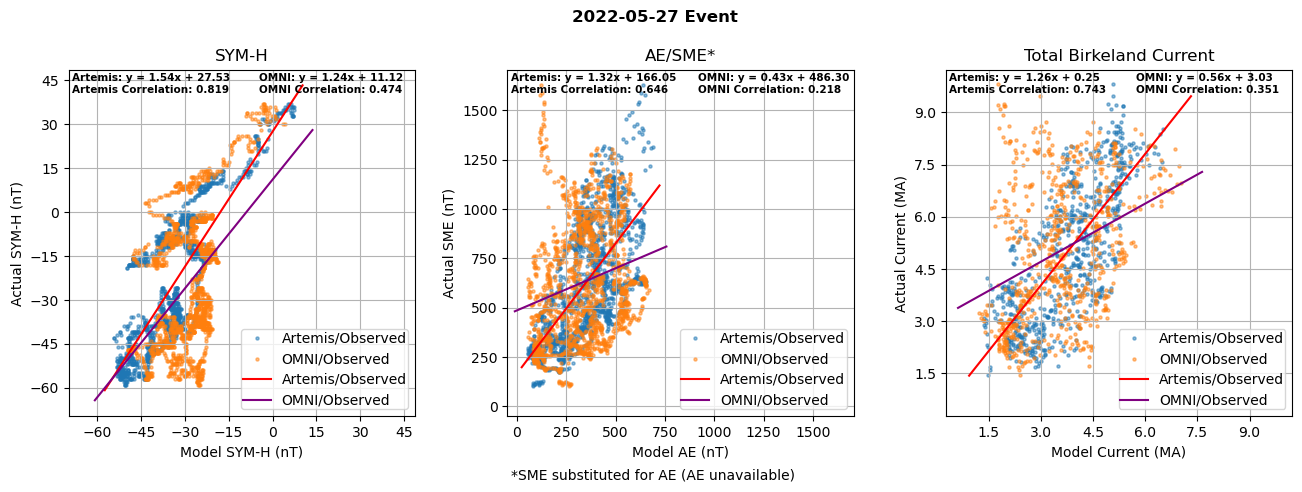

In [32]:
x1=[Omni_SYMH['DST'][60:-1], Omni_AE['AE'][60:-1], Omni_Currents['current'][30:]]
x2=[Artemis_SYMH['DST'][60:-1], Artemis_AE['AE'][60:-1], Artemis_Currents['current'][30:]]
y=[SYMH['SYM-H'], AE['SME'], -1* ampere['I total down North [MA]']]

colors = ['C0', 'C0', 'C0',]
titles=['SYM-H', 'AE/SME*', 'Total Birkeland Current']
xlabels = ['Model SYM-H (nT)', 'Model AE (nT)', 'Model Current (MA)']
ylabels = ['Actual SYM-H (nT)', 'Actual SME (nT)', 'Actual Current (MA)']


fig, axs = plt.subplots(1, 3, figsize=(13.2,4.8))

for i, ax in enumerate(axs):
    ax.set_box_aspect(1)
    ax.scatter(x2[i], y[i], s=5, alpha=0.5, label='Artemis/Observed')
    ax.scatter(x1[i], y[i], s=5, alpha=0.5, label='OMNI/Observed')

    statistics_a = stats.linregress(x2[i], y[i])
    abline(statistics_a[0], statistics_a[1], ax, color='red', label='Artemis/Observed')

    statistics_o = stats.linregress(x1[i], y[i])
    abline(statistics_o[0], statistics_o[1], ax, color='purple', label='OMNI/Observed')

    min_limit = min(ax.get_xlim() + ax.get_ylim())
    max_limit = max(ax.get_xlim() + ax.get_ylim())
    ax.set_xlim(min_limit, max_limit)
    ax.set_ylim(min_limit, max_limit)
    ax.xaxis.set_major_locator(MaxNLocator(8))
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.grid(visible=True, which='major', axis='both', c='0.7')

    equation_text1 = f'Artemis: y = {statistics_a.slope:.2f}x + {statistics_a.intercept:.2f} \nArtemis Correlation: {round(statistics_a.rvalue, 3)}'
    ax.text(0.01, 0.99, equation_text1, transform=ax.transAxes, fontsize=7.5, weight='bold', verticalalignment='top')

    equation_text2 = f'OMNI: y = {statistics_o.slope:.2f}x + {statistics_o.intercept:.2f} \nOMNI Correlation: {round(statistics_o.rvalue, 3)}'
    ax.text(0.55, 0.99, equation_text2, transform=ax.transAxes, fontsize=7.5, weight='bold', verticalalignment='top')

    ax.set(title=titles[i], xlabel=xlabels[i], ylabel=ylabels[i])
    ax.legend(loc='lower right', borderpad=0.1)

    if i==1:
        ax.text(0.01, -0.15, '*SME substituted for AE (AE unavailable)', transform=ax.transAxes, fontsize=10, verticalalignment='top')

plt.suptitle('2022-05-27 Event', weight='bold')
plt.tight_layout()
plt.savefig('plots/indexstats.jpg', dpi=300)